In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('data/BA_reviews.csv')
df.shape

(1000, 3)

In [3]:
df.reviews= df.reviews.str.split('|',expand=True)[1]

In [4]:
df=df.drop(columns=['Unnamed: 0'],axis=1)

In [5]:
import re

# Define a function to clean the text
def clean(text):
# Removes all special characters and numericals leaving the alphabets
    text = re.sub('[^A-Za-z]+', ' ', str(text))
    return text

# Cleaning the text in the review column
df['Cleaned Reviews'] = df['reviews'].apply(clean)
df.head()

,reviews,country,Cleaned Reviews
0,Came from Glasgow to London and took connect...,United States,Came from Glasgow to London and took connecti...
1,My flight on on 12 May 2023 got delayed an h...,United Arab Emirates,My flight on on May got delayed an hour and m...
2,Cairo is a 5 hour flight and BA considers it...,United Kingdom,Cairo is a hour flight and BA considers it to...
3,After travelling London to Madrid with Briti...,United Kingdom,After travelling London to Madrid with Britis...
4,My luggage was mis-tagged in Dallas on my wa...,United States,My luggage was mis tagged in Dallas on my way...


In [6]:
import nltk
from nltk.tokenize import word_tokenize
from nltk import pos_tag
from nltk.corpus import stopwords
from nltk.corpus import wordnet

In [7]:
# POS tagger dictionary
pos_dict = {'J':wordnet.ADJ, 'V':wordnet.VERB, 'N':wordnet.NOUN, 'R':wordnet.ADV}
def token_stop_pos(text):
    tags = pos_tag(word_tokenize(text))
    #print(tags)
    newlist = []
    for word, tag in tags:
        if word.lower() not in set(stopwords.words('english')):
          newlist.append(tuple([word, pos_dict.get(tag[0])]))
          #print(tag[0])
          #print(pos_dict.get(tag[0]))
    return newlist 

df['POS tagged'] = df['Cleaned Reviews'].apply(token_stop_pos)
df.head()

,reviews,country,Cleaned Reviews,POS tagged
0,Came from Glasgow to London and took connect...,United States,Came from Glasgow to London and took connecti...,"[(Came, n), (Glasgow, n), (London, n), (took, ..."
1,My flight on on 12 May 2023 got delayed an h...,United Arab Emirates,My flight on on May got delayed an hour and m...,"[(flight, n), (May, n), (got, v), (delayed, v)..."
2,Cairo is a 5 hour flight and BA considers it...,United Kingdom,Cairo is a hour flight and BA considers it to...,"[(Cairo, n), (hour, n), (flight, n), (BA, n), ..."
3,After travelling London to Madrid with Briti...,United Kingdom,After travelling London to Madrid with Britis...,"[(travelling, v), (London, n), (Madrid, n), (B..."
4,My luggage was mis-tagged in Dallas on my wa...,United States,My luggage was mis tagged in Dallas on my way...,"[(luggage, n), (mis, r), (tagged, v), (Dallas,..."


In [8]:
from nltk.stem import WordNetLemmatizer
wordnet_lemmatizer = WordNetLemmatizer()
def lemmatize(pos_data):
    lemma_rew = " "
    for word, pos in pos_data:
     if not pos:
        lemma = word
        lemma_rew = lemma_rew + " " + lemma
     else:
        lemma = wordnet_lemmatizer.lemmatize(word, pos=pos)
        lemma_rew = lemma_rew + " " + lemma
    return lemma_rew

df['Lemma'] = df['POS tagged'].apply(lemmatize)
df.head()

,reviews,country,Cleaned Reviews,POS tagged,Lemma
0,Came from Glasgow to London and took connect...,United States,Came from Glasgow to London and took connecti...,"[(Came, n), (Glasgow, n), (London, n), (took, ...",Came Glasgow London take connect flight Amer...
1,My flight on on 12 May 2023 got delayed an h...,United Arab Emirates,My flight on on May got delayed an hour and m...,"[(flight, n), (May, n), (got, v), (delayed, v)...",flight May get delay hour minute result canc...
2,Cairo is a 5 hour flight and BA considers it...,United Kingdom,Cairo is a hour flight and BA considers it to...,"[(Cairo, n), (hour, n), (flight, n), (BA, n), ...",Cairo hour flight BA consider short haul eve...
3,After travelling London to Madrid with Briti...,United Kingdom,After travelling London to Madrid with Britis...,"[(travelling, v), (London, n), (Madrid, n), (B...",travel London Madrid British Airways Iberia ...
4,My luggage was mis-tagged in Dallas on my wa...,United States,My luggage was mis tagged in Dallas on my way...,"[(luggage, n), (mis, r), (tagged, v), (Dallas,...",luggage mis tag Dallas way Cairo via London ...


In [9]:
df=df[['reviews','Lemma','country']]
df.sample(5)

,reviews,Lemma,country
599,San Jose to London. The TV screen of 12F was...,San Jose London TV screen F break could lock...,United States
581,London to Buenos Aires. We paid extra on top...,London Buenos Aires pay extra top holiday co...,United Kingdom
321,We will never use BA again for a long haul f...,never use BA long haul flight experience fli...,United Kingdom
19,Terrible. I have traveled twice with them th...,Terrible travel twice year via business clas...,United Kingdom
761,Johannesburg to London. I booked a seat with...,Johannesburg London book seat without luggag...,South Africa


In [10]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()


# function to calculate vader sentiment
def vadersentimentanalysis(review):
    vs = analyzer.polarity_scores(review)
    return vs['compound']

df['Sentiment'] = df['Lemma'].apply(vadersentimentanalysis)

# function to analyse
def vader_analysis(compound):
    if compound >= 0.5:
        return 'Positive'
    elif compound < 0 :
        return 'Negative'
    else:
        return 'Neutral'
df['Analysis'] = df['Sentiment'].apply(vader_analysis)
df.head()

,reviews,Lemma,country,Sentiment,Analysis
0,Came from Glasgow to London and took connect...,Came Glasgow London take connect flight Amer...,United States,-0.3400,Negative
1,My flight on on 12 May 2023 got delayed an h...,flight May get delay hour minute result canc...,United Arab Emirates,-0.9356,Negative
2,Cairo is a 5 hour flight and BA considers it...,Cairo hour flight BA consider short haul eve...,United Kingdom,-0.8283,Negative
3,After travelling London to Madrid with Briti...,travel London Madrid British Airways Iberia ...,United Kingdom,-0.6486,Negative
4,My luggage was mis-tagged in Dallas on my wa...,luggage mis tag Dallas way Cairo via London ...,United States,-0.6124,Negative


In [11]:
vader_counts = df['Analysis'].value_counts()
vader_counts

Positive    500
Negative    391
Neutral     109
Name: Analysis, dtype: int64

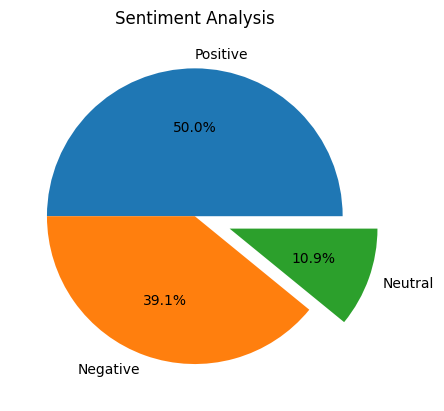

In [12]:
%matplotlib inline
plt.title('Sentiment Analysis')
plt.pie(vader_counts.values, labels = vader_counts.index, explode = (0, 0, 0.25), autopct='%1.1f%%', shadow=False)
plt.show()

In [13]:
country_counts = df['country'].value_counts()
country_counts

United Kingdom           565
United States            167
Australia                 35
Canada                    32
South Africa              18
Germany                   17
Sweden                    11
Netherlands               11
United Arab Emirates      10
Switzerland               10
Ireland                   10
France                     9
India                      9
Malaysia                   8
Spain                      7
Italy                      6
Hong Kong                  6
Singapore                  5
Greece                     5
Belgium                    5
Poland                     4
Qatar                      3
New Zealand                3
Argentina                  3
Ghana                      3
Thailand                   3
Brazil                     2
Mexico                     2
Czech Republic             2
Norway                     2
Austria                    2
Saudi Arabia               2
Romania                    2
Israel                     1
Kuwait        

Text(0.5, 1.0, 'Maximum Number of Reviews Count by Country')

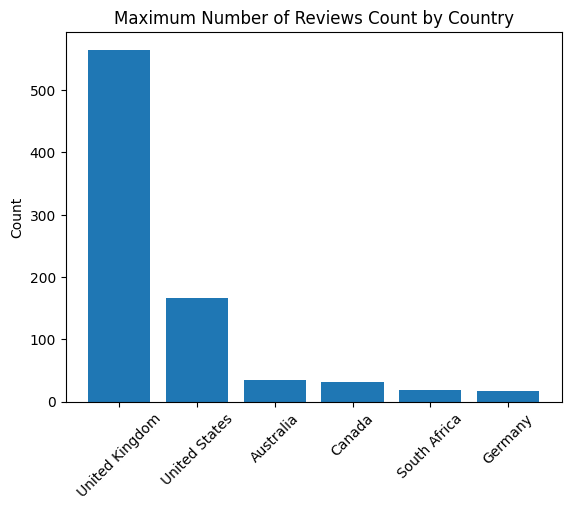

In [14]:
counts={'United Kingdom':565,
'United States':167,
'Australia':35,
'Canada':32,
'South Africa':18,
'Germany':17}

plt.bar(counts.keys(),counts.values())
plt.xticks(rotation=45)
# plt.xlabel(counts.keys())
plt.ylabel('Count')
plt.title('Maximum Number of Reviews Count by Country')

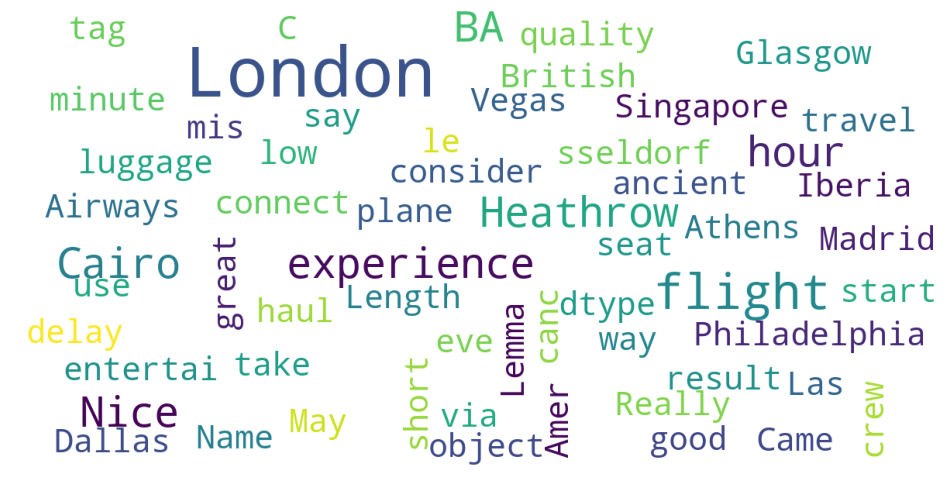

In [15]:
from wordcloud import WordCloud, STOPWORDS
stopwords = set(STOPWORDS)

def show_wordcloud(data):
    wordcloud = WordCloud(
        background_color='white',
        stopwords=stopwords,
        max_words=100,
        max_font_size=30,
        scale=3,
        random_state=1)

    wordcloud=wordcloud.generate(str(data))

    fig = plt.figure(1, figsize=(12, 12))
    plt.axis('off')

    plt.imshow(wordcloud)
    plt.show()

show_wordcloud(df.Lemma)